In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [3]:
df = pd.read_csv("titanic.csv")

In [4]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [44]:
df.shape

(8693, 14)

In [46]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


count shows null values. highly skewed data. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
PassengerId     8693 non-null object
HomePlanet      8492 non-null object
CryoSleep       8476 non-null object
Cabin           8494 non-null object
Destination     8511 non-null object
Age             8514 non-null float64
VIP             8490 non-null object
RoomService     8512 non-null float64
FoodCourt       8510 non-null float64
ShoppingMall    8485 non-null float64
Spa             8510 non-null float64
VRDeck          8505 non-null float64
Name            8493 non-null object
Transported     8693 non-null bool
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [58]:
df.isnull().sum(axis=1).sort_values(ascending=False).head(10)

3072    3
2639    3
6112    3
6904    3
5806    3
7682    3
3882    3
3535    3
5208    3
4548    3
dtype: int64

In [5]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [42]:
def percentage_null(df):
    d={}
    for i in range(0,len(null_values)):
        new_val = (null_values[i]*100)/df.shape[0]
        d[null_values.index[i]] = new_val
    print(d)

percentage_null(df)   

{'PassengerId': 0.0, 'HomePlanet': 2.312205222592891, 'CryoSleep': 2.496261359714713, 'Cabin': 2.289198205452663, 'Destination': 2.093638559760727, 'Age': 2.0591280340503855, 'VIP': 2.3352122397331185, 'RoomService': 2.082135051190613, 'FoodCourt': 2.105142068330841, 'ShoppingMall': 2.392729782583688, 'Spa': 2.105142068330841, 'VRDeck': 2.1626596111814105, 'Name': 2.300701714022777, 'Transported': 0.0}


% of null values not that high, don't remove 

In [12]:
#temp = df.dropna(how="any",axis=0)
#temp.shape
(df.isna().sum().sum() / df.shape[0]) * 100

26.73415391694467

In [23]:
df2 = df.copy(deep=True)

In [24]:
df2.dropna(inplace=True)

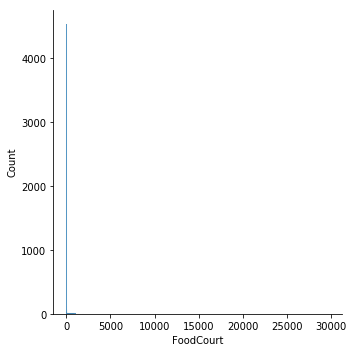

In [10]:
sns.displot(df2['FoodCourt'])

C:\Users\Gunisha Chaturvedi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


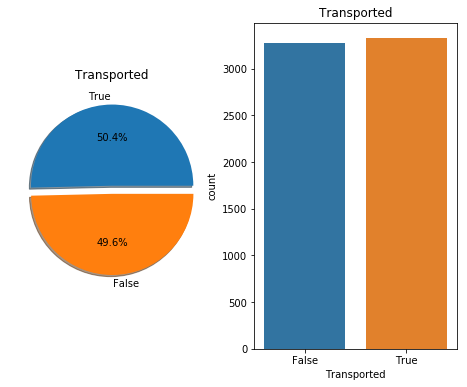

In [11]:
f,ax=plt.subplots(1,2,figsize=(8,6))
df2['Transported'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Transported')
ax[0].set_ylabel('')
sns.countplot('Transported',data=df2,ax=ax[1])
ax[1].set_title('Transported')
plt.show()

In [12]:
ID = df2.iloc[:,0]

def get_group(val):
    group = val.split('_')[0]
    return (group)

group = ID.apply (get_group)
group

0       0001
1       0002
2       0003
3       0003
4       0004
5       0005
6       0006
8       0007
9       0008
11      0008
12      0009
13      0010
14      0011
17      0015
18      0016
19      0017
20      0017
21      0020
22      0020
24      0020
26      0020
29      0025
30      0026
31      0028
32      0030
33      0031
34      0031
36      0034
37      0035
39      0038
        ... 
8654    9231
8655    9231
8657    9234
8658    9235
8659    9237
8660    9239
8661    9241
8662    9242
8663    9244
8668    9251
8669    9252
8670    9252
8671    9253
8672    9254
8673    9256
8676    9261
8677    9264
8678    9267
8679    9267
8680    9268
8681    9270
8682    9272
8683    9272
8685    9275
8686    9275
8688    9276
8689    9278
8690    9279
8691    9280
8692    9280
Name: PassengerId, Length: 6606, dtype: object

In [27]:
group.unique().size

6217

In [13]:
df2['HomePlanet'].value_counts()

Earth     3566
Europa    1673
Mars      1367
Name: HomePlanet, dtype: int64

In [14]:
df2.groupby(["HomePlanet","Transported"])["Transported"].count()

HomePlanet  Transported
Earth       False          2048
            True           1518
Europa      False           569
            True           1104
Mars        False           662
            True            705
Name: Transported, dtype: int64

C:\Users\Gunisha Chaturvedi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


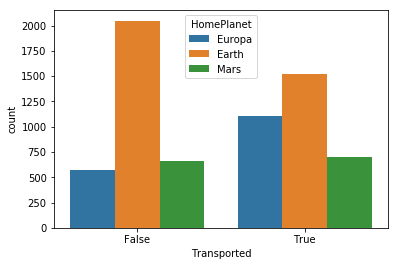

In [15]:
sns.countplot(df2['Transported'],hue=df2['HomePlanet'])
plt.show()

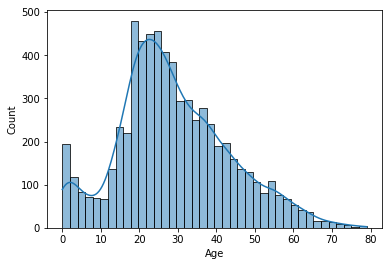

In [16]:
sns.histplot(df2['Age'],kde=True)

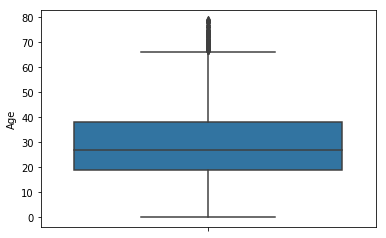

In [17]:
sns.boxplot(y=df2['Age'])

In [18]:
df2['Destination'].value_counts()

TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: Destination, dtype: int64

In [19]:
df2.groupby(['Destination','Transported'])['Transported'].count()

Destination    Transported
55 Cancri e    False           531
               True            876
PSO J318.5-22  False           308
               True            315
TRAPPIST-1e    False          2440
               True           2136
Name: Transported, dtype: int64

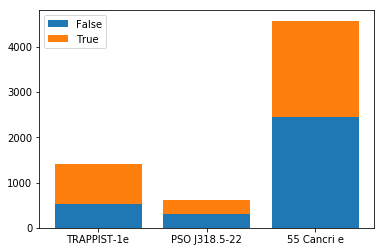

In [34]:
p = df2.groupby(['Destination','Transported'])['Transported'].count()
x = df2['Destination'].unique()
y1 = p[0:6:2]
y2 = p[1:6:2]
plt.bar(x, y1)
plt.bar(x, y2, bottom=y1)
plt.legend(["False", "True"])

In [25]:
l = list(df2['Cabin'])
deck=[]
num=[]
side=[]
for i in range(0,len(l)):
    val = l[i].split ('/')
    deck.append(val[0])
    num.append(val[1])
    side.append(val[2])

In [26]:
df2['cabin_deck']=deck
df2['cabin_num']=num
df2['cabin_side']=side
df2.drop(columns=['PassengerId','Cabin'],inplace=True)

In [27]:
df2['Name'].value_counts()

Elaney Webstephrey    2
Sus Coolez            2
Anton Woody           2
Gwendy Sykess         2
Asch Stradick         2
Sharie Gallenry       2
Juane Popelazquez     2
Gollux Reedall        2
Troya Schwardson      2
Dia Cartez            2
Carry Contrevins      2
Ankalik Nateansive    2
Alraium Disivering    2
Apix Wala             2
Grake Porki           2
Loree Wolfernan       2
Rona Casonston        1
Leony Georgasey       1
Timmy Hanner          1
Troya Puckenton       1
Verek Wolferguson     1
Eline Cainghannon     1
Rayle Farleyatton     1
Artis Hanghanson      1
Joana Moorez          1
Alfrey Sarios         1
Joyn Hahnstoneal      1
Anniey Mccarry        1
Gous Empie            1
Pies Welto            1
                     ..
Penne Browlerson      1
Lis Tersimpson        1
Paulie Stanleyd       1
Alasmon Stiven        1
Megany Irwinson       1
Sugaly Chité          1
Zibah Queldry         1
Eleaha Klindsayer     1
Aldebah Gealably      1
Achbah Fueling        1
Canonon Diabysid

In [28]:
df2.drop(columns=['Name'],inplace=True)

In [64]:
df2['CryoSleep'].value_counts()

False    4274
True     2332
Name: CryoSleep, dtype: int64

In [29]:
df2.loc[df2['CryoSleep'] == True, 'CryoSleep'] = 1
df2.loc[df2['CryoSleep'] == False, 'CryoSleep'] = 0

df2.loc[df2['VIP'] == True, 'VIP'] = 1
df2.loc[df2['VIP'] == False, 'VIP'] = 0

df2.loc[df2['Transported'] == True, 'Transported'] = 1
df2.loc[df2['Transported'] == False, 'Transported'] = 0

In [30]:
df2 = pd.get_dummies(df2, columns=['HomePlanet','Destination','cabin_side'])
df2.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin_deck,cabin_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,cabin_side_P,cabin_side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,0,1,0,0,0,1,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,1,0,0,0,0,1,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,0,1,0,0,0,1,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,0,1,0,0,0,1,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,1,0,0,0,0,1,0,1


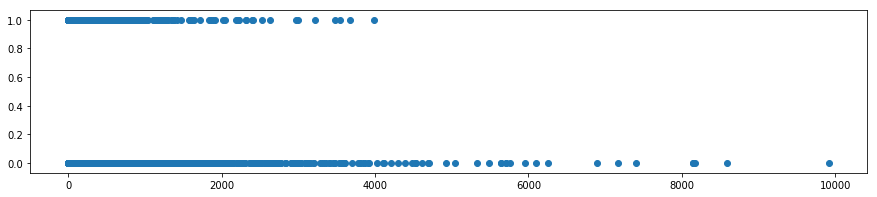

In [31]:
plt.figure(figsize=(15, 3))
plt.scatter (df2.RoomService,df2.Transported)

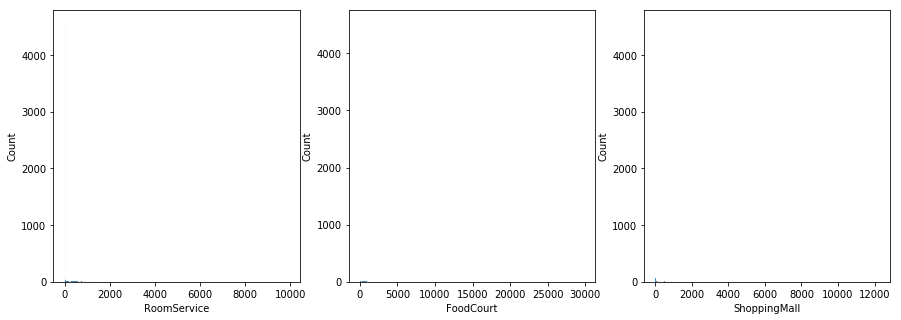

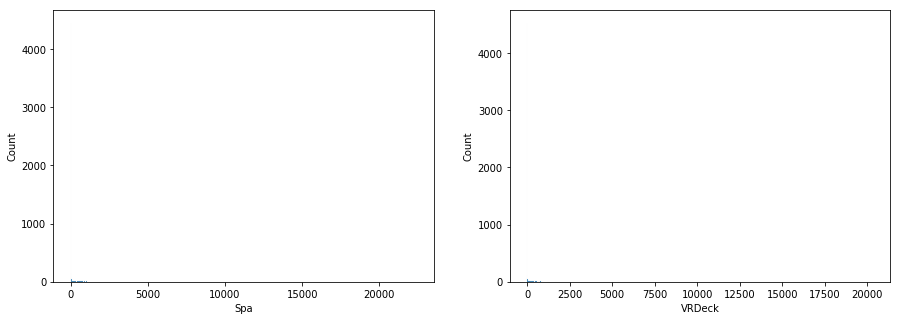

In [32]:
f,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(df2['RoomService'],ax=ax[0])
sns.histplot(df2['FoodCourt'],ax=ax[1])
sns.histplot(df2['ShoppingMall'],ax=ax[2])
plt.show()

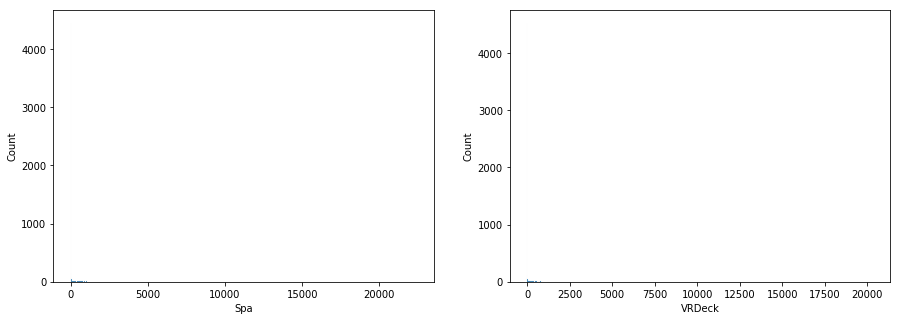

In [33]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(df2['Spa'],ax=ax[0])
sns.histplot(df2['VRDeck'],ax=ax[1])
plt.show()

In [34]:
df2.loc[df2['RoomService'] == 0.0, 'RoomService'] = 1.0

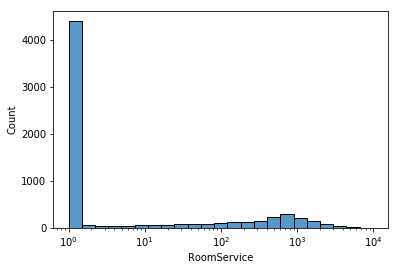

In [35]:
sns.histplot(data=df2, x='RoomService', log_scale=True)

In [40]:
df2.loc[(df2['RoomService']<=100.0) & (df2['RoomService']>0.0)]['RoomService']

2       43.0
6       42.0
11      39.0
12      73.0
14       8.0
30      22.0
56      45.0
60       1.0
62       1.0
67      16.0
69      46.0
70       1.0
72      14.0
84       1.0
110     82.0
112      1.0
117     55.0
156      1.0
161     17.0
162     62.0
164     84.0
216      4.0
217     85.0
219     56.0
243     66.0
250     44.0
259      3.0
270     90.0
281      7.0
336     17.0
        ... 
8449    63.0
8451     1.0
8492    24.0
8502    23.0
8505     1.0
8506    34.0
8517    11.0
8523     8.0
8531    15.0
8539    37.0
8558     3.0
8562    83.0
8563     1.0
8568     1.0
8586     9.0
8588    23.0
8590    48.0
8594    65.0
8597    49.0
8609    87.0
8618     1.0
8635    15.0
8638     6.0
8639     2.0
8645     1.0
8657     6.0
8658     8.0
8660     2.0
8683    86.0
8686     1.0
Name: RoomService, Length: 799, dtype: float64

In [36]:
data = df2.apply(lambda x: x['RoomService'] + x['Spa'], axis=1)
data

0          1.0
1        658.0
2       6758.0
3       3330.0
4        868.0
5        292.0
6         42.0
8        217.0
9          1.0
11       149.0
12        73.0
13       719.0
14        10.0
17         1.0
18         1.0
19         1.0
20       412.0
21         1.0
22         1.0
24         1.0
26         1.0
29       999.0
30      1460.0
31      1173.0
32       438.0
33       214.0
34         1.0
36         1.0
37      1735.0
39      3160.0
         ...  
8654       1.0
8655       1.0
8657    1113.0
8658       8.0
8659       1.0
8660     130.0
8661     699.0
8662     102.0
8663       1.0
8668       1.0
8669       1.0
8670       1.0
8671       1.0
8672       1.0
8673       1.0
8676       1.0
8677       1.0
8678       1.0
8679       1.0
8680       1.0
8681       1.0
8682     240.0
8683     294.0
8685       1.0
8686      51.0
8688    1644.0
8689       1.0
8690       2.0
8691     354.0
8692     126.0
Length: 6606, dtype: float64

(array([5609.,  898.,   78.]),
 array([    0,  1000,  5000, 10000]),
 <a list of 3 Patch objects>)

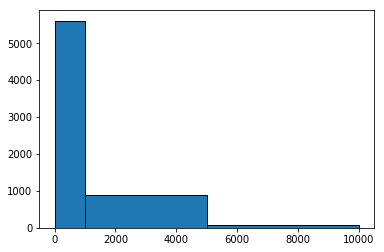

In [37]:
plt.hist(data, bins=[0,1000,5000,10000], edgecolor='black')

In [38]:
df2['expense'] = df2.apply(lambda x: x['RoomService'] + x['FoodCourt'] + x['ShoppingMall'] + x['Spa'] + x['VRDeck'], axis=1)
df2.drop(columns=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],inplace=True)
df2.head()

,CryoSleep,Age,VIP,Transported,cabin_deck,cabin_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,cabin_side_P,cabin_side_S,expense
0,0,39.0,0,0,B,0,0,1,0,0,0,1,1,0,1.0
1,0,24.0,0,1,F,0,1,0,0,0,0,1,0,1,736.0
2,0,58.0,1,0,A,0,0,1,0,0,0,1,0,1,10383.0
3,0,33.0,0,0,A,0,0,1,0,0,0,1,0,1,5177.0
4,0,16.0,0,1,F,1,1,0,0,0,0,1,0,1,1091.0


In [39]:
df2.drop(['cabin_deck'],axis=1,inplace=True)

In [40]:
x = df2.drop(columns = ['Transported'])
y = df2['Transported']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [42]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [43]:
print(confusion_matrix(y_test,y_pred))

[[787 200]
 [350 645]]


In [44]:
print('Accuracy: %.3f' %accuracy_score(y_test, y_pred))

Accuracy: 0.723


In [45]:
coef = model.coef_

In [47]:
pow(math.e,coef)

array([[6.62743076, 0.98625847, 0.81043166, 1.00040026, 0.47984808,
        2.74365573, 0.78686758, 1.36058654, 0.89406528, 0.85160779,
        0.79941831, 1.29586852, 0.99986074]])

In [48]:
coef

array([[ 1.89121721e+00, -1.38368195e-02, -2.10188263e-01,
         4.00176452e-04, -7.34285734e-01,  1.00929124e+00,
        -2.39695300e-01,  3.07915885e-01, -1.11976486e-01,
        -1.60629194e-01, -2.23870933e-01,  2.59181139e-01,
        -1.39267879e-04]])